Camino encontrado: [(2, 3), (2, 4), (1, 4), (0, 4), (0, 3), (0, 2), (0, 1), (0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2)]


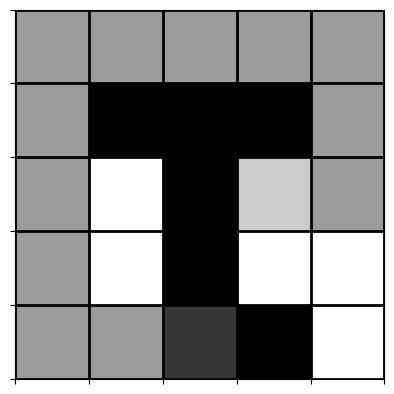

In [45]:
from collections import deque
import matplotlib.pyplot as plt
import random as rd
import numpy as np

# Laberinto representado como una matriz
# 0 = espacio libre, 2 = camino encontrado, 255 = muro
laberinto = [
    [0,   0,   0,   0, 0],
    [0, 255, 255, 255, 0],
    [0,   0, 255,   0, 0],
    [0,   0, 255,   0, 0],
    [0,   0,   0, 255, 0]
]

# Dirección de movimiento (arriba, abajo, izquierda, derecha)
direcciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]

def es_valido(x, y, laberinto, visitado):
    """Verifica si la posición (x, y) es válida para moverse"""
    return 0 <= x < len(laberinto) and 0 <= y < len(laberinto[0]) and laberinto[x][y] == 0 and not visitado[x][y]

def bfs(laberinto, inicio, fin):
    """Implementación de BFS para encontrar el camino más corto en el laberinto"""
    # Crear una matriz de visitados para marcar los nodos visitados
    visitado = [[False for _ in range(len(laberinto[0]))] for _ in range(len(laberinto))]
    
    # Cola para la BFS, almacenará las posiciones y el camino
    cola = deque([(inicio, [inicio])])
    visitado[inicio[0]][inicio[1]] = True

    while cola:
        (x, y), camino = cola.popleft()

        # Si llegamos al destino, devolvemos el camino
        if (x, y) == fin:
            return camino

        # Explorar las 4 direcciones posibles
        for dx, dy in direcciones:
            nx, ny = x + dx, y + dy
            if es_valido(nx, ny, laberinto, visitado):
                visitado[nx][ny] = True
                cola.append(((nx, ny), camino + [(nx, ny)]))

    # Si no hay camino, retornamos None
    return None

# Definir el punto de inicio y el punto de destino (Si se quiere cambiar el punto de inicio y destino, cambiar los valores de inicio y fin respectivamente)
while(True):
    inicio = (rd.randint(0,4), rd.randint(0,4))  # (Fila, Columna)
    fin = (rd.randint(0,4), rd.randint(0,4))     # (Fila, Columna)
    if(laberinto[inicio[0]][inicio[1]] != 255 and laberinto[fin[0]][fin[1]] != 255 and inicio != fin):
        break

# Ejecutar la búsqueda en anchura (BFS)
camino = bfs(laberinto, inicio, fin)

laberinto_array = np.array(laberinto)
if not camino:
    print("No se encontró un camino.")
    laberinto_array[inicio] = 50
    laberinto_array[fin] = 200
else:
    print("Camino encontrado:", camino)

    for (x, y) in camino:
        if ((x,y) == inicio):
            laberinto_array[x, y] = 50
        elif((x,y) == fin):
            laberinto_array[x, y] = 200
        else:
            laberinto_array[x, y] = 100

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Usar imshow para mostrar la matriz
cax = ax.imshow(laberinto_array, cmap='gray_r', vmin=0, vmax=255)
ax.grid(which='both', color='black', linestyle='-', linewidth=2)

ax.set_xticks(np.arange(-.5, len(laberinto[0]), 1))
ax.set_yticks(np.arange(-.5, len(laberinto), 1))
ax.set_xticklabels([])
ax.set_yticklabels([])

# Mostrar la cuadrícula
ax.grid(True)

# Mostrar la figura
plt.show()